# **GRUPO 1**

## Integrantes
* _Valentin De Girolamo_
* _Franco Nuñez_
* _Facundo Perez_
* _Federico Porras_

<hr>

## Tematica elegida: _Simplificar la vida cotidiana_

<hr>

### Links que recopilamos

*  ##### GCBA
  * Colectivos
    * [Recorridos](https://data.buenosaires.gob.ar/dataset/colectivos-recorridos)
    * [Paradas](https://data.buenosaires.gob.ar/dataset/colectivos-paradas)
    * [GTFS](https://data.buenosaires.gob.ar/dataset/colectivos-gtfs)
    * [Movilidad Domiciliaria 2018](https://data.buenosaires.gob.ar/dataset/encuesta-movilidad-domiciliaria)
    * [Metrobus](https://data.buenosaires.gob.ar/dataset/metrobus)
    * [Sube](https://data.buenosaires.gob.ar/dataset/sube)
    * [Molinetes](https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes)
    * [En vivo](https://buenosaires.gob.ar/datosabiertos/historias/movilidad-y-transporte/los-colectivos-en-vivo) _Es un intento, no sabemos si va a funcionar_

* ##### Otras fuentes
  * [Bicis Online](https://citybik.es/) _(probablemente no funcione)_
  * [Ualabee (Online)](https://ualabee.com/city_info/21/XMcKXRJvipc0IAyq5bt0) _Cuando llega el colectivo a cada parada_

<hr>

### Datos que podemos obtener de las BBDD recopiladas
* Periodicidad de llegada
* Trafico de personas
* Lugares más y menos accesibles
* Colectivos con más recorridos
* Arte en paradas de subte
* Transito en el subte

<hr>

## [División de tareas](https://docs.google.com/document/d/1lSX3iR_kFizrqOac8Eh23IPQtO5blM35H3-C_9uScl8/edit?usp=sharing)

# Trabajo con database 'Recorridos'

### Objetivos
Nuestro objetivo es simplificar la vida cotidiana, por lo que decidimos analizar cuantos colectivos tienen cada destino

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/colectivos-recorridos/recorrido-colectivos.csv"
data = pd.read_csv(file_url, sep=";", encoding_errors="ignore", error_bad_lines=False)
data.head()

<ipython-input-12-f20a7c73e1a5>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file_url, sep=";", encoding_errors="ignore", error_bad_lines=False)


,shape_id,direction_id,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,service_id,trip_headsign,trip_short_name,block_id,exceptional,WKT
0,2098,1,2098,385,1A,JMPARA001,Barrio Policial-Toma Nueva: Barrio Policial,3,5,441860-1,Barrio Policial,4194HI1001,0,"MULTILINESTRING ((-58.441381 -34.620477,-58.44..."
1,2096,0,2096,385,1A,JMPARA001,Barrio Policial-Toma Nueva: Toma Nueva,3,5,441791-1,Toma Nueva,4194HI0001,0,"MULTILINESTRING ((-58.617296 -34.647403,-58.61..."
2,276,0,276,34,1A,JNAMBA001,Pra. Junta - Est. Morn: a Est. Morn,3,1,22497-1,a Est. Morn,151HI0001,0,"MULTILINESTRING ((-58.487821 -34.677851,-58.48..."
3,277,1,277,34,1A,JNAMBA001,Pra. Junta - Est. Morn: a Pra. Junta,3,1,22666-1,a Pra. Junta,151HI1001,0,"MULTILINESTRING ((-58.377312 -34.583263,-58.37..."
4,1415,1,1415,40,2A,JNAMBA002,Aduana - Las Heras y Av. Eva Peron: a Aduana,3,1,94547-1,a Aduana,307HI1001,0,"MULTILINESTRING ((-58.487649 -34.635193,-58.48..."


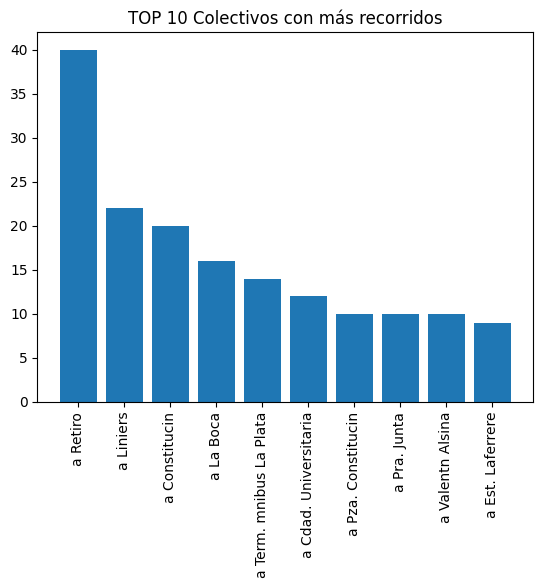

Quedan afuera del grafico 981 recorridos. 610 de ellos tienen 1 solo colectivo. 721 de ellos tienen menos de 5 colectivos.
Diccionario con cuantos colectivos tienen cuantos recorridos (key:cantidad de colectivos, value:recorridos) {40: 1, 22: 1, 20: 1, 16: 1, 14: 1, 12: 1, 10: 3, 9: 3, 8: 3, 7: 3, 6: 4, 5: 3, 4: 15, 3: 17, 2: 79, 1: 610}


In [ ]:
counted = data["trip_short_name"].value_counts()

totalCounted = counted.sum()

counted.values
counted.index

top10 = []
for i in range(10):
  top10.append([counted.index[i], counted.values[i]])

top10df = pd.DataFrame(data=top10)
top10df.columns = ["trip_short_name", "N"]

#for i in range(10):
#  top10df["trip_short_name"][i] = top10df["trip_short_name"][i] + " (" + str(round(top10df["N"][i]*10000/total)/100) + "%)"

plt.rcParams.update({'font.size': 10})
plt.xticks(rotation=90)

plt.bar(top10df["trip_short_name"], top10df["N"])
plt.title("TOP 10 Colectivos con más recorridos")
plt.show()
#plt.pie(top10df["N"], labels=top10df["trip_short_name"])
#plt.show()
#plt.bar(counted.index, counted.values)
#plt.show()

myDict = {}
for i in counted.values:
  if i in myDict.keys(): myDict[i] += 1
  else: myDict[i] = 1

total = top10df["N"].sum()
print(f"Quedan afuera del grafico {totalCounted - total} recorridos. 610 de ellos tienen 1 solo colectivo. {myDict[1] + myDict[2] + myDict[3] + myDict[4]} de ellos tienen menos de 5 colectivos.")

recorridos_diez_colectivos = 0
for i in myDict.keys():
  if i>=10: recorridos_diez_colectivos += 1

print("Diccionario con cuantos colectivos tienen cuantos recorridos (key:cantidad de colectivos, value:recorridos)", myDict)

* Conclusion: Los recorridos con más colectivos van a Retiro (40), Liniers (22) o Constitución (20).

* ¿De qué le sirve a las personas esa conclusion para su vida cotidiana?
Podemos decir entonces que al viajar en colectivo en la vida cotidiana es más probable encontrarnos con personas que tengan uno de estos 3 destinos (muy posiblemente viviendo allí).

# Trabajo con database 'Molinetes'

disponible también en https://colab.research.google.com/drive/125dt4glUF3Nl8EGuEA46eNsKQh_V9vTS#scrollTo=oEwGUd960WCT

### Objetivos
Nuestro objetivo es simplificar la vida cotidiana, por lo que decidimos analizar cuánta gente toma los subtes en cada hora para saber cuando es más conveniente viajar, y por lo tanto viajar de manera mas comoda.

### Elegimos este tema porque...
El ayudar a la gente y evitar problemas innecesarios es algo que puede ayudar mucho a la gente en general, y el subte fue un tema de especial interés entre los participantes

In [3]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "//content/drive/MyDrive/202303_PAX15min-ABC.csv"
# file_path = "/content/drive/Othercomputers/My Computer/Aprender_Programando_2023/Compartido/FrancoNunez/202303_PAX15min-ABC.csv"
with open(file_path, 'r') as f:
  texto = f.read()
texto = texto.replace('"','')
with open(file_path+'modificado', 'w') as f:
  f.write(texto)
subtes_abc = pd.read_csv(file_path+'modificado', delimiter=';')

In [ ]:
subtes_abc['DESDE'] = subtes_abc['DESDE'].apply(lambda x: x[:-3])

In [ ]:
file_path = "//content/drive/MyDrive/202303_PAX15min-DEH.csv"
# file_path = "/content/drive/Othercomputers/My Computer/Aprender_Programando_2023/Compartido/FrancoNunez/202303_PAX15min-DEH.csv"

with open(file_path, 'r') as f:
  texto2 = f.read()
texto2 = texto2.replace('"','')
with open(file_path+'modificado', 'w') as f:
  f.write(texto2)
subtes_deh = pd.read_csv(file_path+'modificado', delimiter=';')

In [ ]:
subtes_deh['DESDE'] = subtes_deh['DESDE'].apply(lambda x: x[:-3])

In [ ]:
subtes = pd.concat([subtes_abc, subtes_deh])

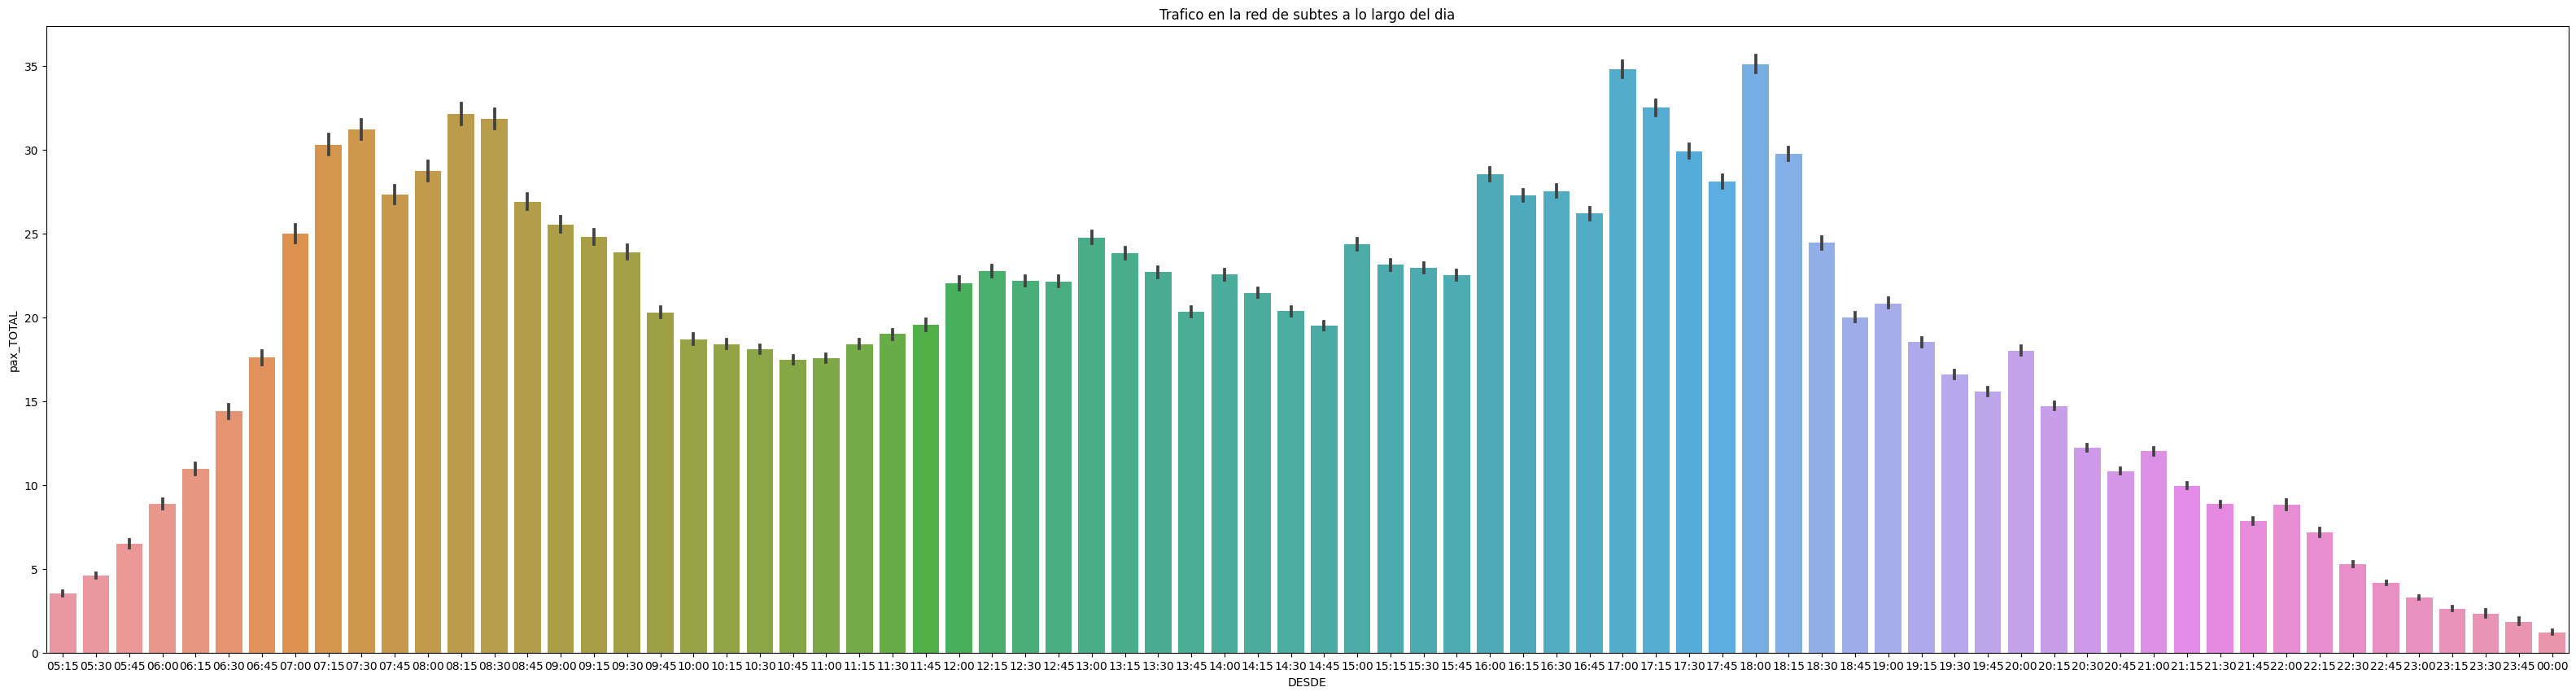

In [ ]:
plt.figure(figsize=(40, 10))
sns.barplot(data=subtes, x="DESDE", y="pax_TOTAL")
plt.title("Trafico en la red de subtes a lo largo del dia")
plt.show()

* Conclusión: en la red de subtes, los horarios de mayor concentración de tráfico son a la mañana (entre las 7:00 y 9:00) y a la tarde (entre las 17:00 y las 18:00). Se puede notar que estas son las llamadas "horas pico", en las cuales la mayoría de la gente entra y sale de sus trabajos.

* ¿De qué le sirve a las personas esa conclusion para su vida cotidiana? Si se desea tener un viaje tranquilo, cómodo y que exista la posibilidad de conseguir asientos desocupados, lo ideal sería evitar estos horarios.



In [ ]:
lista_estaciones = subtes['ESTACION'].unique()
lista_estaciones = np.sort(lista_estaciones)
estacion_seleccionada = widgets.Dropdown(options=lista_estaciones,
                                         description='Estación: ',
                                         disabled=False)
def armar_grafico(estacion):
    plt.figure(figsize=(40, 10))
    g = sns.barplot(data=subtes[subtes['ESTACION']==estacion], x="DESDE", y="pax_TOTAL")
    plt.title(f'Trafico en la estacion {estacion} a lo largo del dia')
    plt.show()
    return None
interact(armar_grafico, estacion = estacion_seleccionada)

interactive(children=(Dropdown(description='Estación: ', options=('9 de julio', 'Acoyte', 'Agüero', 'Alberti',…

<function __main__.armar_grafico(estacion)>

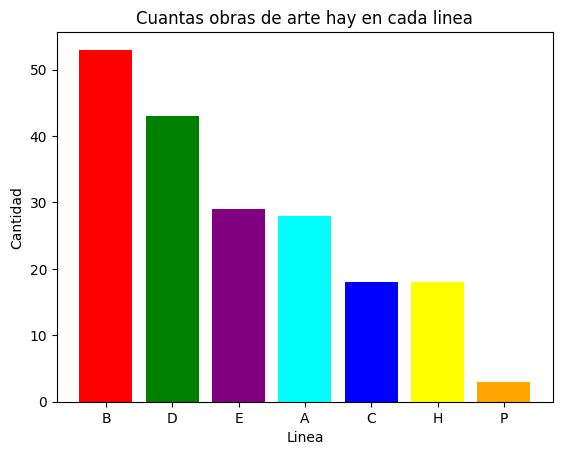

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("obras-de-arte.csv", sep=";")
datos = datos.drop(columns=["OBSERVACIONES"])
pd.set_option("display.max_columns",6)
#print(datos.LINEA.value_counts())
grafico = plt.bar(datos.LINEA.value_counts().index, datos.LINEA.value_counts().tolist(), color = ["red","green","purple","cyan", "blue", "yellow", "orange"])

plt.title("Cuantas obras de arte hay en cada linea")
plt.xlabel("Linea")
plt.ylabel("Cantidad")
plt.show()

* Conclusión: Este grafico representa que tantas obras de arte hay en cada estacion, siendo la B la dominante.

* ¿De qué le sirve a las personas esa conclusion para su vida cotidiana? Por lo que si es de su gusto el arte visual puede priorizar ir por estas lineas

In [6]:
mapa = pd.read_csv("//content/drive/MyDrive/bocas-de-subte.csv")

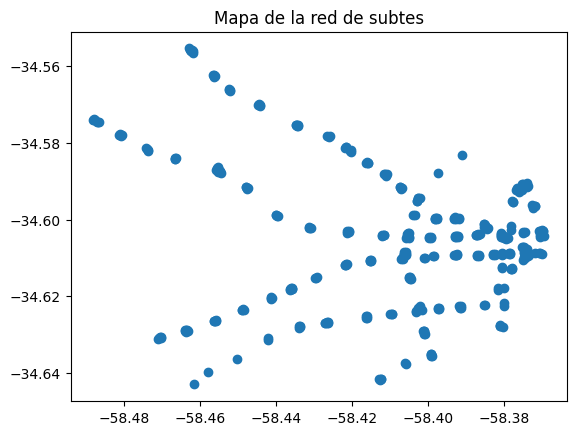

In [8]:
plt.title("Mapa de la red de subtes")
plt.scatter(mapa['long'], mapa['lat'])

In [9]:
lista_estaciones = mapa['estacion'].unique()
lista_estaciones = np.sort(lista_estaciones)
estacion_seleccionada = widgets.Dropdown(options=lista_estaciones,
                                         description='Estación: ',
                                         disabled=False)
def responder(estacion):
    data = mapa.loc[(mapa["estacion"]==estacion)]
    print ("Direccion de las bocas de la estacion:")
    print (data["dom_orig"])
    print( )
    print ("Barrio de las bocas de la estacion:")
    print (data["barrio"])
interact(responder, estacion = estacion_seleccionada)

interactive(children=(Dropdown(description='Estación: ', options=('9 DE JULIO', 'ACOYTE', 'AGÜERO', 'ALBERTI',…

<function __main__.responder(estacion)>

Conclusión: Con este programa, el usuario podrá saber en que dirección y barrio está ubicada cualquier estación de la red de subtes.

¿De qué le sirve a las personas esa conclusion para su vida cotidiana? Porque si una persona conoce el nombre de alguna estación, pero desconoce en que lugar está ubicada, esto le podría ser útil. Por ejemplo: si un amigo le dice que se encuentren en la estación Caseros, pero no sabe donde está aquella estación.

Aclaración: en algunos casos, pueden aparecer 2 o más barrios, ya que algunas estaciones se encuentran justo en el límite entre uno y otro.

# Final